In [1]:
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt

In [2]:
all_results = []

results = os.listdir('results/')

for f in results:
    r = np.load(f'results/{f}',allow_pickle=True)
    all_results.append(r)

In [3]:
pairs = [j for j in itertools.combinations(range(0,5),2)]
forwards = {}
reverse = {}

for p in pairs:
    forwards[p] = []
    reverse[p] = []

for p in pairs:
    for r in all_results:
        if f'lig{p[0]}to{p[1]}' in r.directory:
            forwards[p].append(r)
        elif f'lig{p[1]}to{p[0]}' in r.directory:
            reverse[p].append(r)

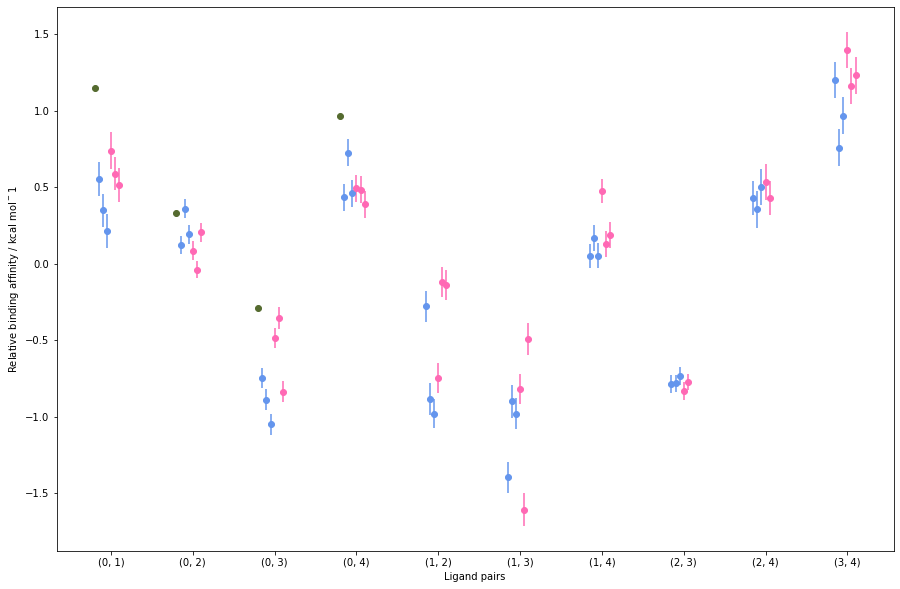

In [4]:
david_calc = {(0,1):-1.15,(0,2):-0.33,(0,3):0.29,(0,4):-0.97}

plot_args = {'marker':'.','markersize':12}

plt.figure(figsize=(15,10))
for i,p in enumerate(forwards.keys()):
    if p in david_calc:
        plt.errorbar(i,-david_calc[p],color='darkolivegreen',**plot_args,label='Daves')
    for j,r in enumerate(forwards[p],1):
        plt.errorbar(i+j*0.05,r.bindingdg._value,yerr=r.bindingddg._value,color='cornflowerblue',**plot_args)
        
for i,p in enumerate(reverse.keys()):
    for j,r in enumerate(reverse[p]):
        plt.errorbar(0.2+i+j*0.05,-r.bindingdg._value,yerr=r.bindingddg._value,color='hotpink',**plot_args)


plt.xticks(np.arange(len(forwards.keys()))+0.2, forwards.keys())
plt.ylabel(rf'Relative binding affinity / kcal mol$^{-1}$')
plt.xlabel('Ligand pairs')

plt.show()

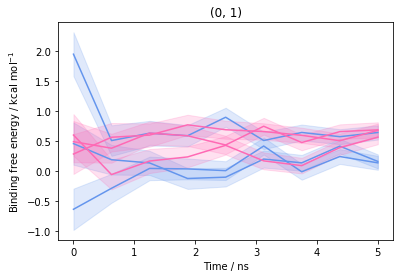

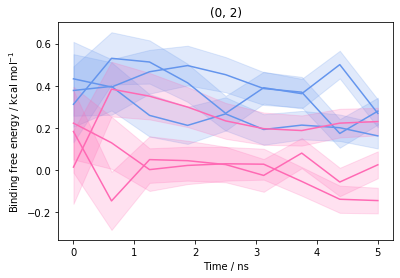

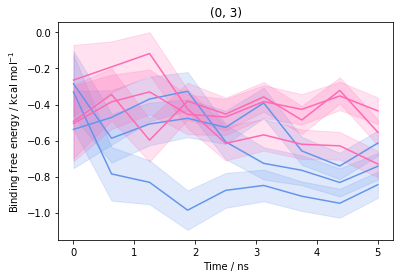

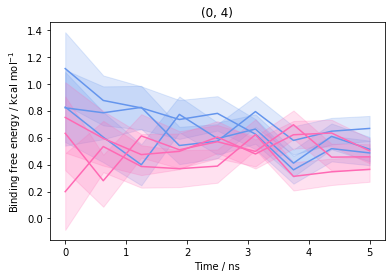

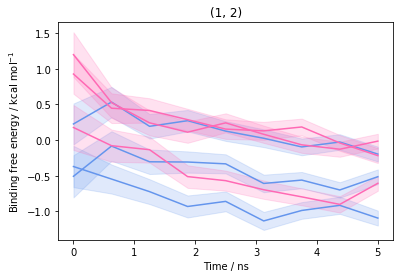

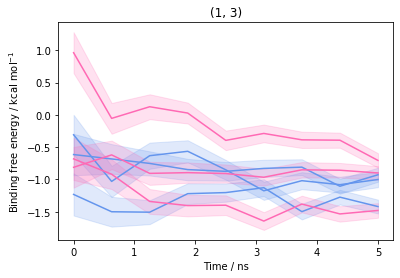

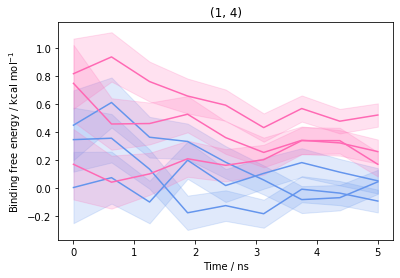

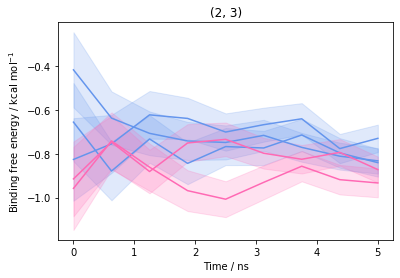

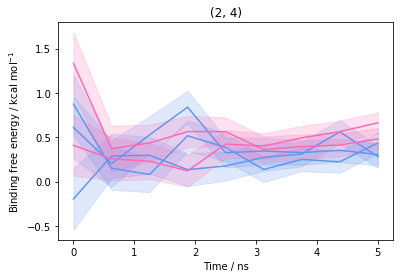

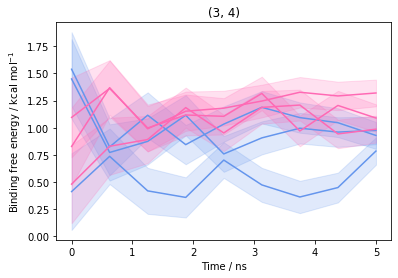

In [5]:

for i,p in enumerate(forwards.keys()):
    for j,r in enumerate(forwards[p],1):
        y = np.asarray([(i-j)._value for i,j in zip(r._soldg_history,r._comdg_history)])
        x = np.linspace(0.,5.,len(y))
        yerr = np.asarray([((i**2+j**2)**0.5)._value for i,j in zip(r._solddg_history,r._comddg_history)])
        plt.plot(x,y,color='cornflowerblue')
        plt.fill_between(x,y-yerr,y+yerr,color='cornflowerblue',alpha=0.2)
    for j,r in enumerate(reverse[p],1):
        y = np.asarray([(j-i)._value for i,j in zip(r._soldg_history,r._comdg_history)])
        yerr = np.asarray([((i**2+j**2)**0.5)._value for i,j in zip(r._solddg_history,r._comddg_history)])
        plt.plot(x,y,color='hotpink')
        plt.fill_between(x,y-yerr,y+yerr,color='hotpink',alpha=0.2)
    plt.title(p)
    plt.xlabel('Time / ns')
    plt.ylabel(r'Binding free energy / kcal mol$^{-1}$')
    plt.show()